In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt


In [2]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.1 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 5,
        'num_rounds': 4000,
        'metric' : 'auc'
    }



In [3]:
df_all = pd.read_csv('../data/processed/df_all.csv')
df_songs = pd.read_csv('../data/processed/df_songs.csv')
df_members = pd.read_csv('../data/processed/df_members.csv')


In [4]:
df_train = df_all[df_all['target']!=-1]
df_test = df_all[df_all['target']==-1]

In [5]:
df_songs.head()



,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_minute,genre_ids_counts,artist_name_counts,...,lyricist_counts,artist_composer_same,artist_lyricist_same,composer_lyricist_same,artist_composer_lyricist_same,name,isrc,song_name_length,song_country,song_year
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,4,1,352,...,165.0,0,0,0,0,焚情,TWB531410010,2.0,TW,2014.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,3,1,10,...,8.0,0,0,1,0,PLAYING WITH FIRE,NaN,17.0,na,NaN
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,3,1,375,...,NaN,0,0,1,0,SORRY| SORRY,NaN,12.0,na,NaN
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,4,1,349,...,99.0,0,0,0,0,愛我的資格,TWC950206108,5.0,TW,2002.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,2,1,2419,...,1751.0,0,0,1,0,Mary Had a Little Lamb,NaN,22.0,na,NaN


In [6]:
category_feats = ['source_screen_name', 'source_system_tab', 'source_type', 
                  'registered_via', 'gender', 
                  'genre_ids','language','song_country','song_year']

real_feats = ['song_length','song_length_minute','genre_ids_counts','bd',
       'artist_name_counts', 'composer_counts', 'lyricist_counts','city', 
       'artist_composer_same', 'artist_lyricist_same', 'df_membership_days',
       'composer_lyricist_same', 'artist_composer_lyricist_same','song_name_length',
             'registration_year','expiration_date','registration_month',
                  'registration_date','expiration_year','expiration_month','registration_year',]

feats = category_feats + real_feats

In [7]:
df_train = pd.merge(df_train, df_members, how='left', on='msno')
df_train = pd.merge(df_train, df_songs, how='left', on='song_id')

df_test = pd.merge(df_test, df_members, how='left', on='msno')
df_test = pd.merge(df_test, df_songs, how='left', on='song_id')


In [8]:
df_train['gender'] = df_train['gender'].fillna("NIL")
df_test['gender'] = df_test['gender'].fillna('NIL')



In [9]:
for col in category_feats:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')


X_train = df_train[feats]
y_train = df_train['target'].values


X_test = df_test[feats]
ids = df_test['id'].values

# del train, test; gc.collect();
d_train_final = lgb.Dataset(X_train, y_train)
watchlist_final = lgb.Dataset(X_train, y_train)

In [10]:
# df_test[feats].info()

In [11]:
model_f1 = lgb.train(params, train_set=d_train_final,  valid_sets=watchlist_final, verbose_eval=5)

/home/xiaoran/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/xiaoran/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[5]	valid_0's auc: 0.668501
[10]	valid_0's auc: 0.670758
[15]	valid_0's auc: 0.672712
[20]	valid_0's auc: 0.674059
[25]	valid_0's auc: 0.675194
[30]	valid_0's auc: 0.676304
[35]	valid_0's auc: 0.677351
[40]	valid_0's auc: 0.678289
[45]	valid_0's auc: 0.679339
[50]	valid_0's auc: 0.680045
[55]	valid_0's auc: 0.6807
[60]	valid_0's auc: 0.681333
[65]	valid_0's auc: 0.681933
[70]	valid_0's auc: 0.682367
[75]	valid_0's auc: 0.6829
[80]	valid_0's auc: 0.683433
[85]	valid_0's auc: 0.683924
[90]	valid_0's auc: 0.684337
[95]	valid_0's auc: 0.684701
[100]	valid_0's auc: 0.68509
[105]	valid_0's auc: 0.685493
[110]	valid_0's auc: 0.685825
[115]	valid_0's auc: 0.686362
[120]	valid_0's auc: 0.686702
[125]	valid_0's auc: 0.687195
[130]	valid_0's auc: 0.687534
[135]	valid_0's auc: 0.687834
[140]	valid_0's auc: 0.688151
[145]	valid_0's auc: 0.688435
[150]	valid_0's auc: 0.688722
[155]	valid_0's auc: 0.689038
[160]	valid_0's auc: 0.689358
[165]	valid_0's auc: 0.689678
[170]	valid_0's auc: 0.689933
[175]

[1370]	valid_0's auc: 0.707931
[1375]	valid_0's auc: 0.707956
[1380]	valid_0's auc: 0.707973
[1385]	valid_0's auc: 0.707987
[1390]	valid_0's auc: 0.708007
[1395]	valid_0's auc: 0.708018
[1400]	valid_0's auc: 0.708035
[1405]	valid_0's auc: 0.708048
[1410]	valid_0's auc: 0.708057
[1415]	valid_0's auc: 0.708066
[1420]	valid_0's auc: 0.708151
[1425]	valid_0's auc: 0.708162
[1430]	valid_0's auc: 0.708181
[1435]	valid_0's auc: 0.708206
[1440]	valid_0's auc: 0.708221
[1445]	valid_0's auc: 0.708251
[1450]	valid_0's auc: 0.708263
[1455]	valid_0's auc: 0.708277
[1460]	valid_0's auc: 0.708302
[1465]	valid_0's auc: 0.708311
[1470]	valid_0's auc: 0.708339
[1475]	valid_0's auc: 0.70835
[1480]	valid_0's auc: 0.708364
[1485]	valid_0's auc: 0.708377
[1490]	valid_0's auc: 0.708392
[1495]	valid_0's auc: 0.708404
[1500]	valid_0's auc: 0.708413
[1505]	valid_0's auc: 0.708423
[1510]	valid_0's auc: 0.708441
[1515]	valid_0's auc: 0.708458
[1520]	valid_0's auc: 0.708479
[1525]	valid_0's auc: 0.708503
[1530]	va

[2700]	valid_0's auc: 0.711757
[2705]	valid_0's auc: 0.711764
[2710]	valid_0's auc: 0.711786
[2715]	valid_0's auc: 0.71179
[2720]	valid_0's auc: 0.711797
[2725]	valid_0's auc: 0.711807
[2730]	valid_0's auc: 0.711817
[2735]	valid_0's auc: 0.711827
[2740]	valid_0's auc: 0.711852
[2745]	valid_0's auc: 0.711867
[2750]	valid_0's auc: 0.711882
[2755]	valid_0's auc: 0.711891
[2760]	valid_0's auc: 0.711913
[2765]	valid_0's auc: 0.711936
[2770]	valid_0's auc: 0.711944
[2775]	valid_0's auc: 0.711954
[2780]	valid_0's auc: 0.711961
[2785]	valid_0's auc: 0.711981
[2790]	valid_0's auc: 0.71201
[2795]	valid_0's auc: 0.71204
[2800]	valid_0's auc: 0.712052
[2805]	valid_0's auc: 0.712057
[2810]	valid_0's auc: 0.712066
[2815]	valid_0's auc: 0.712071
[2820]	valid_0's auc: 0.712075
[2825]	valid_0's auc: 0.712106
[2830]	valid_0's auc: 0.712129
[2835]	valid_0's auc: 0.712152
[2840]	valid_0's auc: 0.712159
[2845]	valid_0's auc: 0.712166
[2850]	valid_0's auc: 0.712174
[2855]	valid_0's auc: 0.712189
[2860]	vali

In [12]:
p_test_1 = model_f1.predict(X_test)

In [13]:
res = pd.DataFrame()
res['id'] = ids
res['target'] = p_test_1


res.to_csv('../data/result3.csv',index=False)

In [14]:
res

,id,target
0,0,0.585694
1,1,0.705582
2,2,0.293219
3,3,0.238819
4,4,0.078324
5,5,0.174739
6,6,0.190286
7,7,0.665333
8,8,0.265756
9,9,0.682389


<Figure size 1296x648 with 0 Axes>

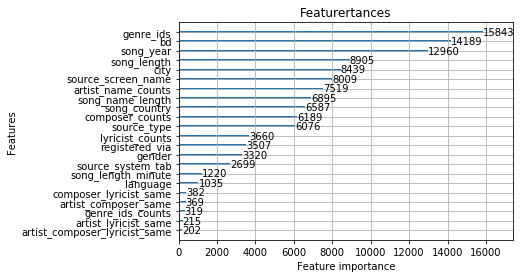

In [22]:
plt.figure(figsize=(18,9))
lgb.plot_importance(model_f1, max_num_features=50)
plt.title("Featurertances")
plt.show()

In [18]:
plt.show()